In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
model_label_dict = {
    'SymEqNet': 'SymmetryNet V1', 'GENNet': 'SymmetryNet V2', 'ResNet': 'DeepCube',
}
MODELS = ['SymEqNet', 'GENNet', 'ResNet']
MODELS_RELABELED = list(map(lambda x: model_label_dict[x], MODELS))
DATASET = '5moves'

# Accuracy

In [3]:
directory = f'data/evals/{DATASET}'
TEST_SIZES = np.arange(0.1, 1.0, 0.1)

In [4]:
acc_dict, correct_dict, total_dict = [{model: {test_size: [] for test_size in TEST_SIZES} for model in MODELS_RELABELED} for _ in range(3)]

for model, model_relab in zip(MODELS, MODELS_RELABELED):
    for test_size in TEST_SIZES:
        for random_seed in range(10):
            filepath = f'{directory}/{model}/ts{test_size:.1f}_rs{random_seed}.txt'
            with open(filepath, 'r') as f:
                acc, correct, total_nr = f.read().strip().split('\n')
                acc = float(acc)
                correct = int(correct)
                total_nr = int(total_nr)
            acc_dict[model_relab][test_size].append(acc)
            correct_dict[model_relab][test_size].append(correct)
            total_dict[model_relab][test_size].append(total_nr)

In [5]:
models_accs_stds = []
for model in MODELS_RELABELED:
    accs_stds= []
    print(f'MODEL {model}')
    for key in acc_dict[model]:
        mean = np.mean(acc_dict[model][key])
        std = np.std(acc_dict[model][key])
        print(f'Test Size {int(key*100)}%: Accuracy {mean:.4f} +- {std:.4f}')
        accs_stds.append(f'{mean:.4f} +- {std:.4f}')
    print('')
    models_accs_stds.append(accs_stds)

MODEL SymmetryNet V1
Test Size 10%: Accuracy 0.7996 +- 0.1673
Test Size 20%: Accuracy 0.7115 +- 0.1564
Test Size 30%: Accuracy 0.8540 +- 0.0504
Test Size 40%: Accuracy 0.8008 +- 0.0862
Test Size 50%: Accuracy 0.7918 +- 0.1135
Test Size 60%: Accuracy 0.7584 +- 0.0933
Test Size 70%: Accuracy 0.8231 +- 0.0829
Test Size 80%: Accuracy 0.7983 +- 0.0578
Test Size 90%: Accuracy 0.7710 +- 0.0415

MODEL SymmetryNet V2
Test Size 10%: Accuracy 0.8520 +- 0.1081
Test Size 20%: Accuracy 0.8464 +- 0.1448
Test Size 30%: Accuracy 0.9023 +- 0.0369
Test Size 40%: Accuracy 0.8382 +- 0.1141
Test Size 50%: Accuracy 0.8560 +- 0.0616
Test Size 60%: Accuracy 0.7595 +- 0.1633
Test Size 70%: Accuracy 0.8818 +- 0.0583
Test Size 80%: Accuracy 0.8589 +- 0.0497
Test Size 90%: Accuracy 0.8191 +- 0.0381

MODEL DeepCube
Test Size 10%: Accuracy 0.9636 +- 0.0053
Test Size 20%: Accuracy 0.9552 +- 0.0052
Test Size 30%: Accuracy 0.9358 +- 0.0050
Test Size 40%: Accuracy 0.9118 +- 0.0080
Test Size 50%: Accuracy 0.8863 +- 0.009

# Greedy

In [6]:
directory = f'data/greedy_search/{DATASET}'
TEST_SIZES = np.arange(0.1, 1.0, 0.1)

In [7]:
solved_rate_dict, perf_solved_rate_dict, solved_nr_dict, perf_solved_nr_dict, total_nr_dict = [
    {model: {test_size: [] for test_size in TEST_SIZES} for model in MODELS_RELABELED} for _ in range(5)
]

for model, model_relab in zip(MODELS, MODELS_RELABELED):
    for test_size in TEST_SIZES:
        for random_seed in range(10):
            filepath = f'{directory}/{model}/ts{test_size:.1f}_rs{random_seed}.txt'
            with open(filepath, 'r') as f:
                solved_rate, perf_solved_rate, solved_nr, perf_solved_nr, total_nr = f.read().strip().split('\n')
                solved_rate, perf_solved_rate = float(solved_rate), float(perf_solved_rate)
                solved_nr, perf_solved_nr, total_nr = int(solved_nr), int(perf_solved_nr), int(total_nr)
            solved_rate_dict[model_relab][test_size].append(solved_rate)
            perf_solved_rate_dict[model_relab][test_size].append(perf_solved_rate)
            solved_nr_dict[model_relab][test_size].append(solved_nr)
            perf_solved_nr_dict[model_relab][test_size].append(perf_solved_nr)
            total_nr_dict[model_relab][test_size].append(total_nr)

In [8]:
for model in MODELS_RELABELED:
    print(f'MODEL {model}')
    for key in solved_rate_dict[model]:
        mean_sr = np.mean(solved_rate_dict[model][key])
        std_sr = np.std(solved_rate_dict[model][key])
        mean_psr = np.mean(perf_solved_rate_dict[model][key])
        std_psr = np.std(perf_solved_rate_dict[model][key])
        print(f'Test Size {int(key*100)}%: Solved rate {mean_sr:.4f} +- {std_sr:.4f}, Perfectly solved rate {mean_psr:.4f} +- {std_psr:.4f}')
    print('')

MODEL SymmetryNet V1
Test Size 10%: Solved rate 0.7860 +- 0.1940, Perfectly solved rate 0.7858 +- 0.1942
Test Size 20%: Solved rate 0.6990 +- 0.1711, Perfectly solved rate 0.6989 +- 0.1711
Test Size 30%: Solved rate 0.8514 +- 0.0545, Perfectly solved rate 0.8513 +- 0.0545
Test Size 40%: Solved rate 0.7930 +- 0.0982, Perfectly solved rate 0.7929 +- 0.0982
Test Size 50%: Solved rate 0.7893 +- 0.1157, Perfectly solved rate 0.7893 +- 0.1157
Test Size 60%: Solved rate 0.7380 +- 0.1244, Perfectly solved rate 0.7380 +- 0.1244
Test Size 70%: Solved rate 0.8177 +- 0.0829, Perfectly solved rate 0.8177 +- 0.0829
Test Size 80%: Solved rate 0.7950 +- 0.0612, Perfectly solved rate 0.7949 +- 0.0613
Test Size 90%: Solved rate 0.7487 +- 0.0606, Perfectly solved rate 0.7487 +- 0.0606

MODEL SymmetryNet V2
Test Size 10%: Solved rate 0.8477 +- 0.1155, Perfectly solved rate 0.8476 +- 0.1156
Test Size 20%: Solved rate 0.8392 +- 0.1658, Perfectly solved rate 0.8391 +- 0.1659
Test Size 30%: Solved rate 0.9023

# A*

In [9]:
directory = f'data/astar_search/{DATASET}'
TEST_SIZES = np.arange(0.1, 1.0, 0.1)

In [10]:
astar_solved_rate_dict, astar_perf_solved_rate_dict, astar_solved_nr_dict, astar_perf_solved_nr_dict, mean_exp_rate_dict, median_exp_rate_dict, astar_total_nr_dict = [
    {model: {test_size: [] for test_size in TEST_SIZES} for model in MODELS_RELABELED} for _ in range(7)
]

for model, model_relab in zip(MODELS, MODELS_RELABELED):
    for test_size in TEST_SIZES:
        for random_seed in range(10):
            filepath = f'{directory}/{model}/ts{test_size:.1f}_rs{random_seed}.txt'
            if os.path.isfile(filepath):
                with open(filepath, 'r') as f:
                    solved_rate, perf_solved_rate, solved_nr, perf_solved_nr, mean_exp_rate, median_exp_rate, total_nr = f.read().strip().split('\n')
                    solved_rate, perf_solved_rate, mean_exp_rate, median_exp_rate = float(solved_rate), float(perf_solved_rate), float(mean_exp_rate), float(median_exp_rate)
                    solved_nr, perf_solved_nr, total_nr = int(solved_nr), int(perf_solved_nr), int(total_nr)
            else:
                solved_rate, perf_solved_rate, solved_nr, perf_solved_nr, mean_exp_rate, median_exp_rate, total_nr = [0] * 7
            astar_solved_rate_dict[model_relab][test_size].append(solved_rate)
            astar_perf_solved_rate_dict[model_relab][test_size].append(perf_solved_rate)
            mean_exp_rate_dict[model_relab][test_size].append(mean_exp_rate)
            median_exp_rate_dict[model_relab][test_size].append(median_exp_rate)
            astar_solved_nr_dict[model_relab][test_size].append(solved_nr)
            astar_perf_solved_nr_dict[model_relab][test_size].append(perf_solved_nr)
            astar_total_nr_dict[model_relab][test_size].append(total_nr)

In [11]:
for model in MODELS_RELABELED:
    print(f'MODEL {model}')
    for key in astar_solved_rate_dict[model]:
        mean_sr = np.mean(astar_solved_rate_dict[model][key])
        std_sr = np.std(astar_solved_rate_dict[model][key])
        mean_psr = np.mean(astar_perf_solved_rate_dict[model][key])
        std_psr = np.std(astar_perf_solved_rate_dict[model][key])
        mean_mean_er = np.mean(mean_exp_rate_dict[model][key])
        std_mean_er = np.std(mean_exp_rate_dict[model][key])
        mean_median_er = np.mean(median_exp_rate_dict[model][key])
        std_median_er = np.std(median_exp_rate_dict[model][key])
        print(f'Test Size {int(key*100)}%: Solved rate {mean_sr:.4f} +- {std_sr:.4f}, Perfectly solved rate {mean_psr:.4f} +- {std_psr:.4f} \
        Mean expansion rate: {mean_mean_er:.4f} +- {std_mean_er:.4f}, Median expansion rate: {mean_median_er:.4f} +- {std_median_er:.4f}')
    print('')

MODEL SymmetryNet V1
Test Size 10%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0001         Mean expansion rate: 84.6089 +- 56.3495, Median expansion rate: 66.1000 +- 26.3152
Test Size 20%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0000         Mean expansion rate: 94.5332 +- 49.0678, Median expansion rate: 67.9000 +- 17.5753
Test Size 30%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0000         Mean expansion rate: 66.1153 +- 12.0032, Median expansion rate: 56.2000 +- 1.8330
Test Size 40%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0000         Mean expansion rate: 79.3121 +- 36.0808, Median expansion rate: 61.5000 +- 12.3471
Test Size 50%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0000         Mean expansion rate: 67.0133 +- 11.4236, Median expansion rate: 58.5000 +- 4.2012
Test Size 60%: Solved rate 1.0000 +- 0.0000, Perfectly solved rate 1.0000 +- 0.0000         Mean expansion

# Plotting Accuracy and Searches

In [12]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

In [13]:
fm = matplotlib.font_manager.json_load("C:\\Users\\Martin\\.matplotlib\\fontlist-v330.json")
print(fm.findfont("serif", rebuild_if_missing=False))
fm.findfont("serif", fontext="afm", rebuild_if_missing=False)

C:\Users\Martin\anaconda3\envs\bakalarka\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif.ttf


'C:\\Users\\Martin\\anaconda3\\envs\\bakalarka\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm\\pncr8a.afm'

In [14]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times-Roman']})

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [16]:
colors = sns.color_palette()[:len(MODELS)]
colors = [colors[0], colors[2], colors[1]]

In [17]:
max_expanded = max([x for key in mean_exp_rate_dict for x in mean_exp_rate_dict[key][TEST_SIZES[-1]]])

In [18]:
category_names = ['Optimal choice\naccuracy', 'Solved by\ngreedy search', 'Opt. solved by\ngreedy search', 'Solved by\nA* search', 'Opt. solved by\nA* search', 'Expanded Nodes in A*']
dicts = [acc_dict, solved_rate_dict, perf_solved_rate_dict, astar_solved_rate_dict, astar_perf_solved_rate_dict, mean_exp_rate_dict]

categories = []
values = []
hues = []

categories2 = []
values2 = []
hues2 = []

for cat, dct in zip(category_names, dicts):
    for key in dct:
        for val in dct[key][TEST_SIZES[-1]]:
            if cat == 'Expanded Nodes in A*':
                # val /= max_expanded
                categories2.append(cat)
                values2.append(val)
                hues2.append(key)
            else:
                categories.append(cat)
                values.append(val)
                hues.append(key)

df_plot = pd.DataFrame({'metric': categories, 'value': values, 'model': hues})
df_plot2 = pd.DataFrame({'metric': categories2, 'value': values2, 'model': hues2})

<Figure size 1440x720 with 0 Axes>

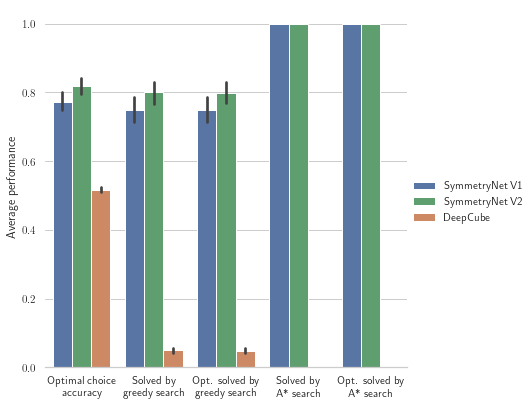

In [19]:
plt.figure(figsize=(20,10))

g = sns.catplot(
    data=df_plot, kind="bar",
    x="metric", y="value", hue="model",
    palette=colors, alpha=1, height=6,
    errorbar=('ci', 95)
)
g.despine(left=True)
# g.set_xticklabels(fontsize=11)
g.set_axis_labels("", "Average performance")
g.legend.set_title("")
plt.savefig('imgs/search/performance.png', dpi=100)
plt.savefig('imgs/search/performance.pdf', format='pdf')
plt.show()

<Figure size 360x720 with 0 Axes>

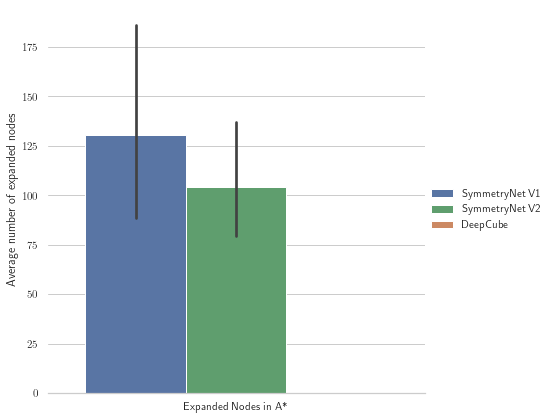

In [39]:
plt.figure(figsize=(5,10))

g2 = sns.catplot(
    data=df_plot2, kind="bar",
    x="metric", y="value", hue="model",
    palette=colors, alpha=1, height=6,
)
g2.despine(left=True)
g2.set_axis_labels("", "Average number of expanded nodes")
g2.legend.set_title("")
plt.savefig('imgs/search/expanded_nodes.png', dpi=100)
plt.savefig('imgs/search/expanded_nodes.pdf', format='pdf')
plt.show()